In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

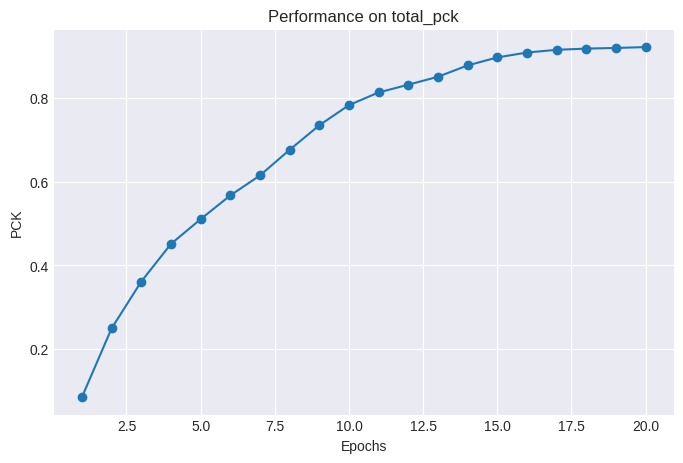

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_model_performance(file_url, joint_name):
    # Define the joint names mapping
    joints = ["total_pck", "Right ankle", "Right knee", "Right hip", "Left hip", "Left knee", "Left ankle", "Right wrist", "Right elbow", "Right shoulder", "Left shoulder", "Left elbow", "Left wrist", "Neck", "Head top"]

    # Check if joint_name is valid
    if joint_name not in joints:
        print("Invalid joint name. Please choose from:", joints)
        return

    # Index of the joint in the data
    joint_index = joints.index(joint_name)

    # Fetching the file content from GitHub
    response = requests.get(file_url)
    if response.status_code != 200:
        print("Failed to fetch the file. Please check the URL.")
        return

    # Reading the data into a DataFrame
    try:
        data = pd.read_csv(io.StringIO(response.text), sep=" ", header=None)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Adjusting the epoch number to start from 1
    data[0] = data[0] + 1

    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.plot(data[0], data[joint_index + 1], marker='o')  # +1 to account for the epoch column
    plt.title(f'Performance on {joint_name}')
    plt.xlabel('Epochs')
    plt.ylabel('PCK')
    plt.grid(True)
    plt.show()

# Test the function with the URL of the file
file_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/accuracies_training_base.txt"
plot_model_performance(file_url, "total_pck")

<ipython-input-32-c606a25d9678>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


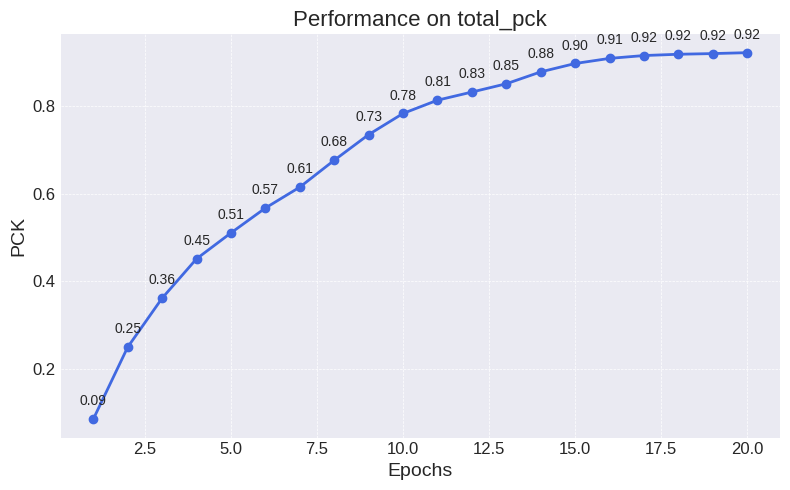

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_model_performance(file_url, joint_name):
    # Use a predefined style for nicer plots
    plt.style.use('seaborn-darkgrid')

    # Define the joint names mapping
    joints = ["total_pck", "Right ankle", "Right knee", "Right hip", "Left hip", "Left knee", "Left ankle", "Right wrist", "Right elbow", "Right shoulder", "Left shoulder", "Left elbow", "Left wrist", "Neck", "Head top"]

    # Check if joint_name is valid
    if joint_name not in joints:
        print("Invalid joint name. Please choose from:", joints)
        return

    # Index of the joint in the data
    joint_index = joints.index(joint_name)

    # Fetching the file content from GitHub
    response = requests.get(file_url)
    if response.status_code != 200:
        print("Failed to fetch the file. Please check the URL.")
        return

    # Reading the data into a DataFrame
    try:
        data = pd.read_csv(io.StringIO(response.text), delim_whitespace=True, header=None)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Adjusting the epoch number to start from 1
    data[0] = data[0] + 1

    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.plot(data[0], data[joint_index + 1], marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6)  # +1 to account for the epoch column
    # Label each point with its PCK value
    for i, txt in enumerate(data[joint_index + 1]):
        plt.annotate(f"{txt:.2f}", (data[0][i], data[joint_index + 1][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(f'Performance on {joint_name}', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('PCK', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Save the figure before calling plt.show()
    plt.savefig(f'/content/model_performance_{joint_name.replace(" ", "_")}.pdf', format='pdf')

    # Then, display the figure
    plt.show()

# Test the function with the URL of the file
file_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/accuracies_training_base.txt"
plot_model_performance(file_url, "total_pck")

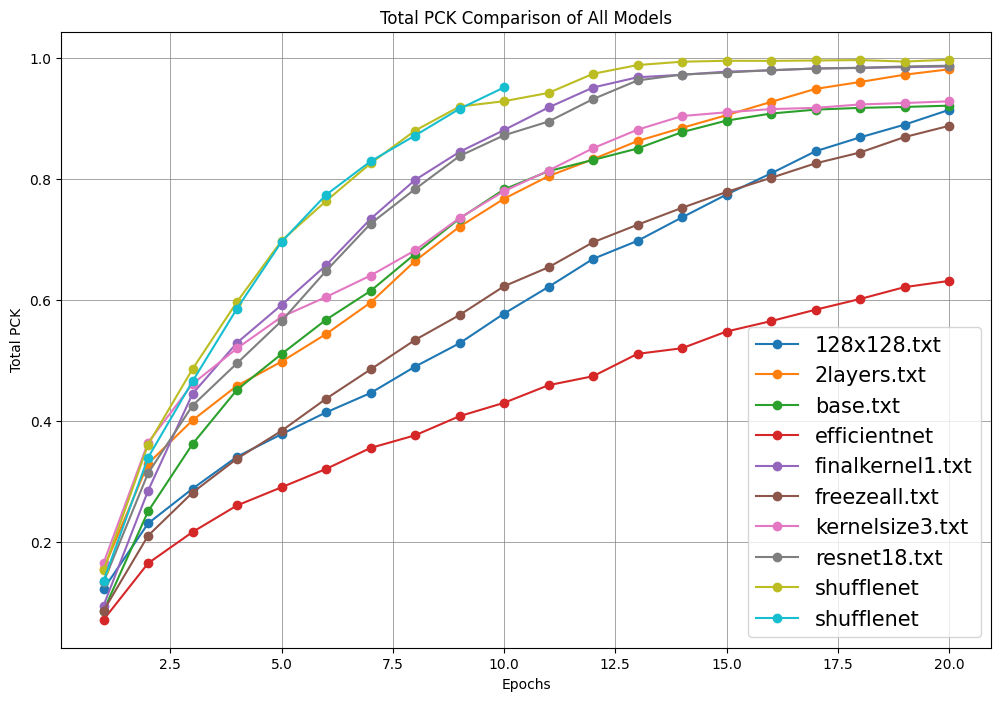

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_all_models_performance():
    # Model file names from the provided GitHub repository screenshot
    model_files = [
        "accuracies_training_128x128.txt",
        "accuracies_training_2layers.txt",
        "accuracies_training_base.txt",
        "accuracies_training_efficientnet_v2_s.txt",
        "accuracies_training_finalkernel1.txt",
        "accuracies_training_freezeall.txt",
        "accuracies_training_kernelsize3.txt",
        "accuracies_training_resnet18.txt",
        "accuracies_training_shufflenet_v2_x2_0.txt",
        "accuracies_training_shufflenet_v2_x2_0_10epoch.txt"
    ]

    # Base URL for the GitHub repository
    base_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/"

    plt.figure(figsize=(12, 8))

    for file_name in model_files:
        file_url = f"{base_url}{file_name}"
        response = requests.get(file_url)
        if response.status_code == 200:
            try:
                # Read the data, assuming that there are no headers and the separator is whitespace
                data = pd.read_csv(io.StringIO(response.text), delim_whitespace=True, header=None)
                # Adjusting the epoch number to start from 1
                plt.plot(data[0]+1, data[1], marker='o', label=file_name.split("_")[2])  # The label uses the third part of the file name
            except Exception as e:
                print(f"Error reading the file {file_name}: {e}")
        else:
            print(f"Failed to fetch the file: {file_name}, Status Code: {response.status_code}")

    plt.title('Total PCK Comparison of All Models')
    plt.xlabel('Epochs')
    plt.ylabel('Total PCK')
    plt.legend(fontsize=15)
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)


    # Save the figure before calling plt.show()
    plt.savefig('/content/all_models_performance.pdf', format='pdf')

    # Then, display the figure
    plt.show()


# Call the function to plot the graph
plot_all_models_performance()

In [ ]:
import requests
import re
import pandas as pd

# Base URL of the GitHub repository containing the .txt files
base_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_test/"

# List of file names to download
file_names = [
    "accuracies_test_128x128.txt", "accuracies_test_2layers.txt",
    "accuracies_test_base.txt", "accuracies_test_efficientnet_v2_s.txt",
    "accuracies_test_finalkernel1.txt", "accuracies_test_freezeall.txt",
    "accuracies_test_kernelsize3.txt", "accuracies_test_resnet18.txt",
    "accuracies_test_shuffle.txt", "accuracies_test_shuffle10.txt"
]

# Joint names as specified
joint_names = [
    "Total PCK", "Right Ankle", "Right Knee", "Right Hip", "Left Hip",
    "Left Knee", "Left Ankle", "Right Wrist", "Right Elbow", "Right Shoulder",
    "Left Shoulder", "Left Elbow", "Left Wrist", "Neck", "Head Top"
]

# Initialize a list of lists for parsed data
parsed_data = []

# Loop through each file, download it, and parse the contents
for file_name in file_names:
    # Download the file content
    response = requests.get(base_url + file_name)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the numbers from the content
        numbers = re.findall(r"\d\.\d{3}", response.text)
        numbers = [float(number) for number in numbers]
        parsed_data.append(numbers)
    else:
        print(f"Failed to download {file_name}")

# Create a DataFrame from the parsed data
df = pd.DataFrame(parsed_data, columns=joint_names, index=[name.split('_')[-1].split('.')[0] for name in file_names])

# Print the DataFrame
print(df)

              Total PCK  Right Ankle  Right Knee  Right Hip  Left Hip  \
128x128           4.358        4.793       3.964      4.550     4.599   
2layers           5.514        5.421       5.371      5.488     5.634   
base              5.710        4.711       5.937      5.957     5.830   
s                 3.406        3.430       3.095      3.320     3.271   
finalkernel1      5.988        5.874       5.927      6.230     6.015   
freezeall         3.536        3.840       3.095      3.359     3.242   
kernelsize3       5.698        4.594       5.830      5.761     5.917   
resnet18          5.672        5.759       5.839      6.015     5.830   
shuffle           3.725        3.762       3.349      3.662     3.662   
shuffle10         3.650        3.703       3.251      3.525     3.447   

              Left Knee  Left Ankle  Right Wrist  Right Elbow  Right Shoulder  \
128x128           4.169       4.771        2.482        3.447           4.589   
2layers           5.351       5.37